# <center><u><font color='red'> Prédiction consommation d'énergie2</font></u></center>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from functions import utils
import math
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from functions.functions import *
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.float_format = '{:,.4f}'.format


In [20]:
target_col='SiteEnergyUse(kBtu)'
stratify_col='PrimaryPropertyType'

In [21]:
df=pd.read_csv('data/cleaned_and_normalized_pca.csv')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pca_0                993 non-null    float64
 1   pca_1                993 non-null    float64
 2   pca_2                993 non-null    float64
 3   pca_3                993 non-null    float64
 4   pca_4                993 non-null    float64
 5   pca_5                993 non-null    float64
 6   pca_6                993 non-null    float64
 7   pca_7                993 non-null    float64
 8   pca_8                993 non-null    float64
 9   pca_9                993 non-null    float64
 10  pca_10               993 non-null    float64
 11  pca_11               993 non-null    float64
 12  pca_12               993 non-null    float64
 13  pca_13               993 non-null    float64
 14  pca_14               993 non-null    float64
 15  pca_15               993 non-null    flo

In [23]:
df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,PrimaryPropertyType,TotalGHGEmissions,SiteEnergyUse(kBtu)
0,3.4191,1.0240,-3.7104,-0.9170,1.1474,-1.7295,2.1265,3.9987,5.8246,-1.9512,...,1.4115,-1.7641,0.3827,-0.0011,1.1814,1.1584,0.5349,Other,221.5100,"6,298,131.5000"
1,0.0907,0.3478,-1.9524,-1.4897,0.6897,0.8147,0.3515,1.2177,0.6393,0.2711,...,1.3925,-1.3145,-1.3175,-0.4507,-0.1133,-0.6598,-0.6136,Mixed Use Property,273.0200,"7,606,084.5000"
2,1.5319,-1.3977,0.7355,1.9839,-0.9851,-1.6633,-0.5505,1.4322,2.6171,-0.3559,...,-4.7515,-3.9549,2.4747,-3.3245,-6.5102,3.8672,5.8284,Other,9.1300,"1,310,236.6250"
3,0.7681,1.5084,-2.1860,-0.6462,0.2466,0.0128,-0.0075,-0.0937,-0.2297,-0.3003,...,0.0059,0.0036,-0.0355,-0.0141,0.0069,0.0202,0.0097,Small- and Mid-Sized Office,157.7700,"4,145,920.5000"
4,0.8153,2.7898,-1.6864,0.9948,-1.0459,-1.5422,1.4146,1.2781,0.2576,0.7766,...,0.5275,0.0113,-0.5034,0.0715,0.0659,0.2032,0.1485,Hotel,215.0000,"6,668,568.5000"


In [24]:
cols=['best_params','R2','rmse','model','time_elapsed']
df_result=pd.DataFrame(columns=cols)
df_result_with_energy_star_score=pd.DataFrame(columns=cols)

In [25]:
test_size=0.25
random_state=42
cv=5
scoring='r2'
feature_cols=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore',stratify_col]]

 
feature_cols_with_energy_star_score=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore',stratify_col]]

 

In [26]:
stratify=df[[stratify_col]]
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df[target_col],test_size=test_size,random_state=random_state)
X_train_with_energy_star_score=X_train[feature_cols_with_energy_star_score]
X_test_with_energy_star_score=X_test[feature_cols_with_energy_star_score]
train_y=y_train.values
test_y=y_test.values



## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

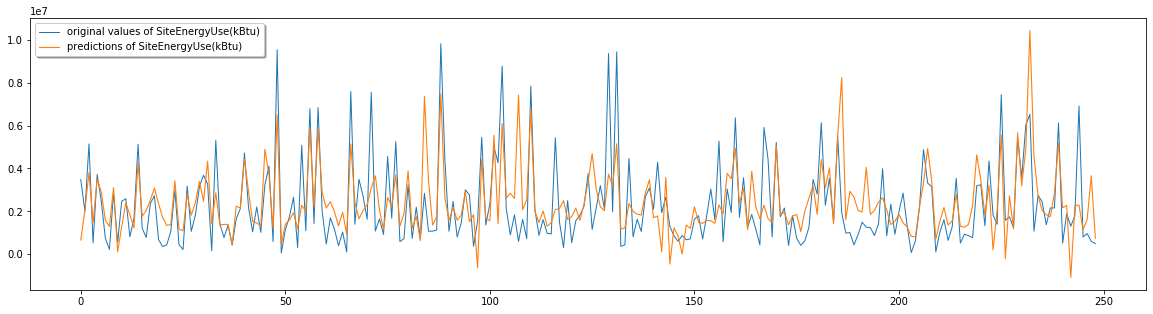

,best_params,R2,rmse,model,time_elapsed
0,None,0.4134,"1,508,936.1362",LinearRegression,0.0023


In [27]:

train_x=X_train.values
test_x=X_test.values
 

result=utils.model_func(df,LinearRegression(),target_col,feature_cols,test_size,random_state,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
df_result

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

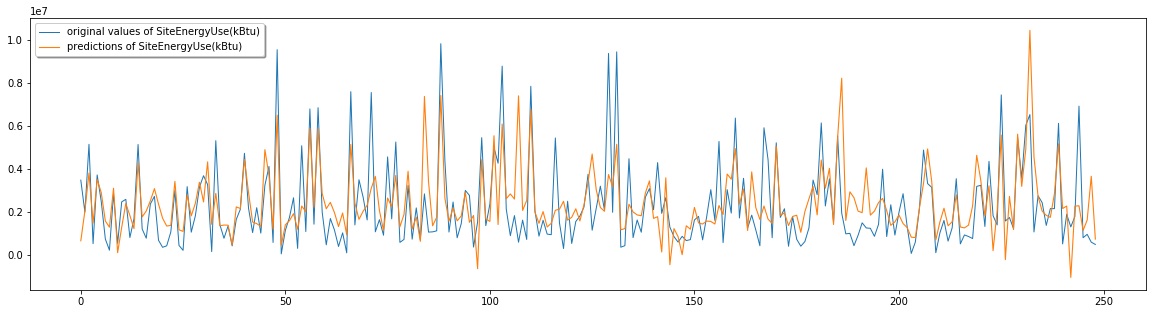

{'best_params': {'alpha': 0.92, 'fit_intercept': True, 'solver': 'saga'}, 'R2': -0.09009538007860836, 'rmse': 1507806.514832354, 'model': 'Ridge', 'time_elapsed': 0.5053624459978892}


In [28]:

train_x=X_train_with_energy_star_score.values
test_x=X_test.values
 
param_grid = [{
    #'alpha':np.arange(0,1.01,0.01),
      'alpha':[0.92],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]



scoring = 'r2'
 
model = Ridge(random_state=random_state)
#ridge.best_params_,ridge.best_score_,rmse,model.__class__.__name__,elapsed
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

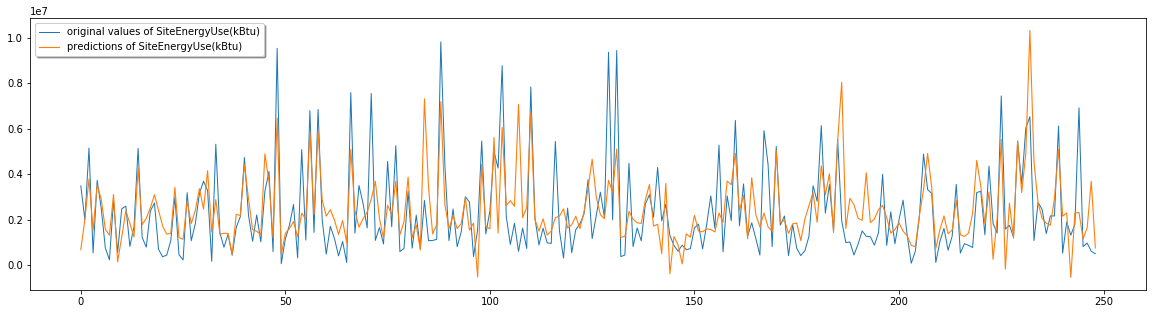

{'best_params': {'alpha': 5994, 'fit_intercept': True}, 'R2': -0.015189277734645467, 'rmse': 1498646.1985422617, 'model': 'Lasso', 'time_elapsed': 0.03647416799503844}


,best_params,R2,rmse,model,time_elapsed
0,None,0.4134,"1,508,936.1362",LinearRegression,0.0023
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",-0.0901,"1,507,806.5148",Ridge,0.5054
2,"{'alpha': 5994, 'fit_intercept': True}",-0.0152,"1,498,646.1985",Lasso,0.0365


In [29]:
train_x=X_train.values
test_x=X_test.values

 
param_grid = [{
    #'alpha':np.arange(3001,10001,1),
      'alpha':[5994],
    'fit_intercept':[True,False],
  
  
}]




 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

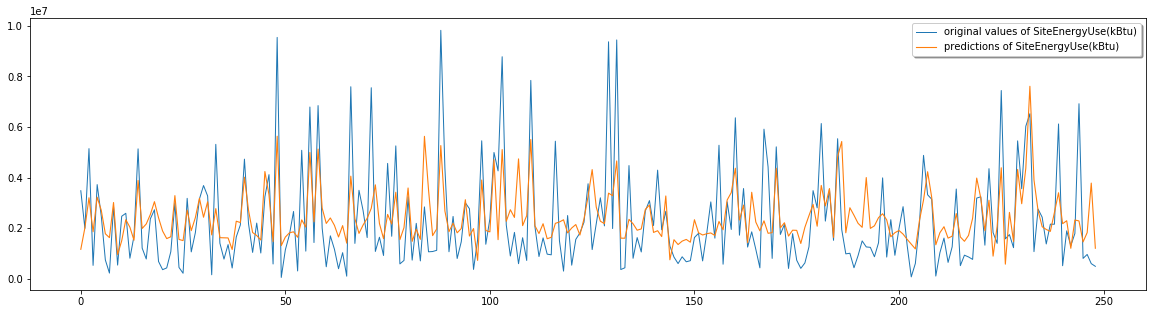

,best_params,R2,rmse,model,time_elapsed
0,None,0.4134,"1,508,936.1362",LinearRegression,0.0023
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",-0.0901,"1,507,806.5148",Ridge,0.5054
2,"{'alpha': 5994, 'fit_intercept': True}",-0.0152,"1,498,646.1985",Lasso,0.0365
3,"{'alpha': 0.67, 'l1_ratio': 0.006}",0.3602,"1,490,863.5738",ElasticNet,20.4850


In [30]:
train_x=X_train.values
test_x=X_test.values
 #param_grid = [{'alpha' : np.arange(0,0.2,0.001)}]
param_grid = [{"alpha": np.arange(0.01,1.01,0.01),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 0.01, 0.001)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge


 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result=df_result.append(result,ignore_index = True)
df_result

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

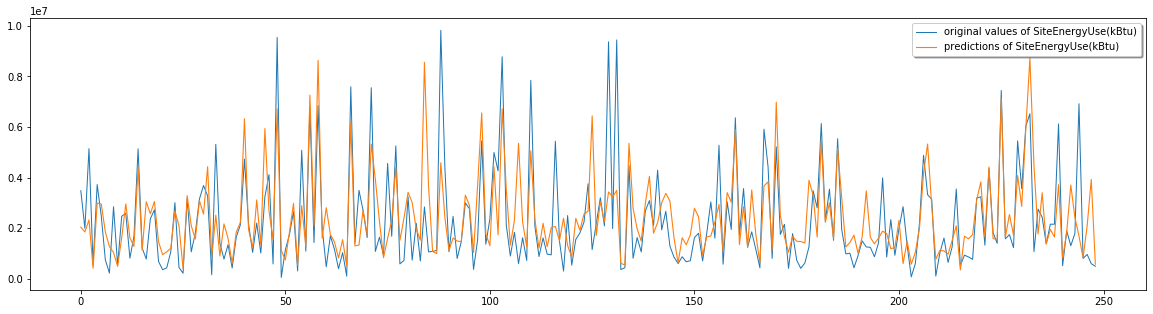

{'best_params': {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, 'R2': 0.5091143276654028, 'rmse': 1450873.702516774, 'model': 'RandomForestRegressor', 'time_elapsed': 2.9564284710068023}


,best_params,R2,rmse,model,time_elapsed
0,None,0.4134,"1,508,936.1362",LinearRegression,0.0023
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",-0.0901,"1,507,806.5148",Ridge,0.5054
2,"{'alpha': 5994, 'fit_intercept': True}",-0.0152,"1,498,646.1985",Lasso,0.0365
3,"{'alpha': 0.67, 'l1_ratio': 0.006}",0.3602,"1,490,863.5738",ElasticNet,20.4850
4,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",0.5091,"1,450,873.7025",RandomForestRegressor,2.9564


In [31]:

train_x=X_train.values
test_x=X_test.values
 

'''
param_grid = {
'n_estimators':[5,20,50,100], # nombre d'arbres
'max_features':['auto', 'sqrt'], # nombre de variables tenu en compte pour la création de chaque arbre
'max_depth':np.arange(10,130,10), # nombre maximum de niveaux dans chaque arbre de décision 
'min_samples_split':[2, 6, 10], # nombre minimal d'observation avant séparation du noeud
'min_samples_leaf':[1, 3, 4], #nombre minimal d'observation pour créer une feuille
'bootstrap':[True, False] # méthode d'échantillonnage
}   
'''
 
## best params


param_grid={'bootstrap': [False],
  'max_depth': [40],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2],
  'n_estimators': [100]}

model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
print(result)
df_result


In [32]:
#df_result['best_params']
#df_result.iloc[34][['best_params']]
result                        

{'best_params': {'bootstrap': False,
  'max_depth': 40,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 'R2': 0.5091143276654028,
 'rmse': 1450873.702516774,
 'model': 'RandomForestRegressor',
 'time_elapsed': 2.9564284710068023}

  ### 2 <u>XGBoost</u>

#### 2-1 <u>XGBoost sans ENERGYSTARScore </u>

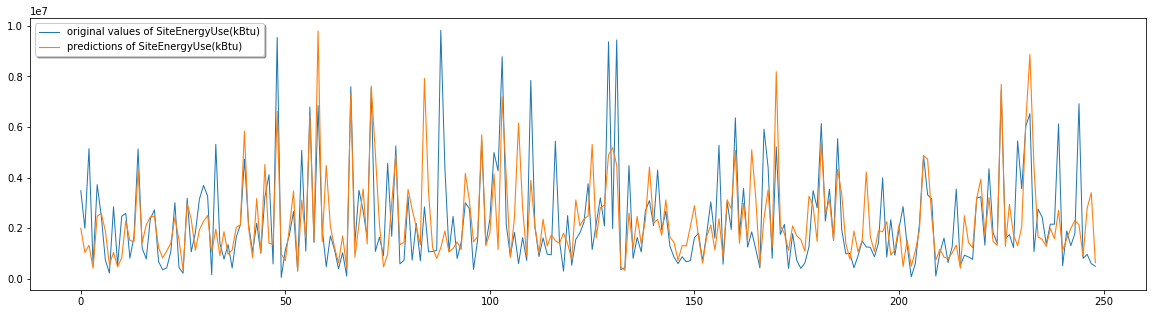

,best_params,R2,rmse,model,time_elapsed
0,None,0.4134,"1,508,936.1362",LinearRegression,0.0023
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",-0.0901,"1,507,806.5148",Ridge,0.5054
2,"{'alpha': 5994, 'fit_intercept': True}",-0.0152,"1,498,646.1985",Lasso,0.0365
3,"{'alpha': 0.67, 'l1_ratio': 0.006}",0.3602,"1,490,863.5738",ElasticNet,20.4850
4,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",0.5091,"1,450,873.7025",RandomForestRegressor,2.9564
5,"{'learning_rate': 0.1, 'max_depth': 35, 'n_est...",0.4482,"1,586,604.6503",XGBRegressor,4.4842


In [33]:
 
train_x=X_train.values
test_x=X_test.values
 

'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [35], 'n_estimators': [50]}

model = XGBRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result
 

In [34]:
result

{'best_params': {'learning_rate': 0.1, 'max_depth': 35, 'n_estimators': 50},
 'R2': 0.44815037620088927,
 'rmse': 1586604.6502903632,
 'model': 'XGBRegressor',
 'time_elapsed': 4.48416040999291}

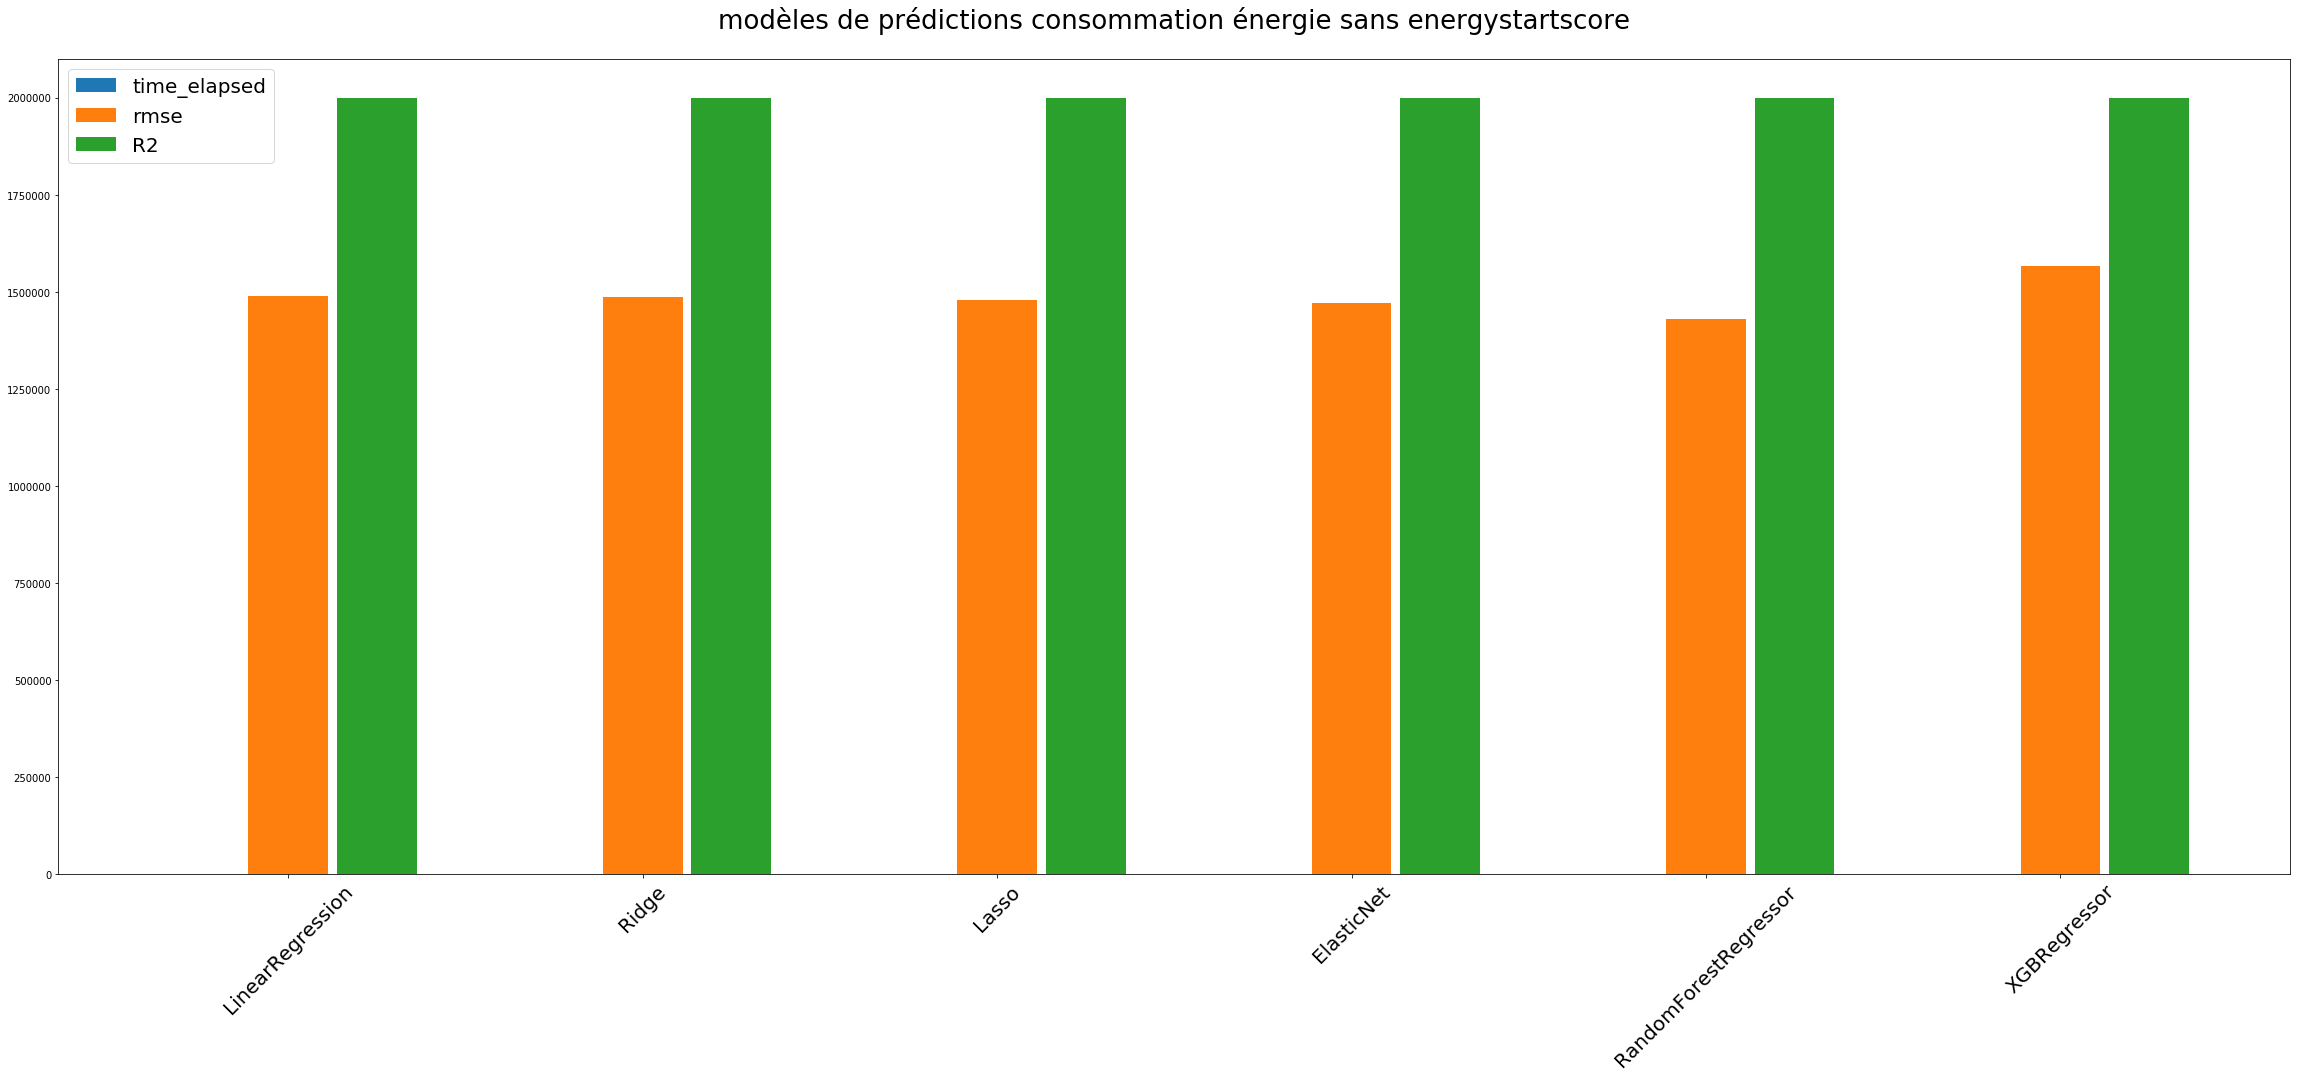

In [35]:
from sklearn.preprocessing import StandardScaler
Labels=df_result['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result.copy()
data_plot['R2']=data_plot['R2']+2000000
data_plot['rmse']=data_plot['rmse']-20000
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions consommation énergie sans energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

In [36]:
df_result.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
4,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",0.5091,"1,450,873.7025",RandomForestRegressor,2.9564
5,"{'learning_rate': 0.1, 'max_depth': 35, 'n_est...",0.4482,"1,586,604.6503",XGBRegressor,4.4842
0,None,0.4134,"1,508,936.1362",LinearRegression,0.0023
3,"{'alpha': 0.67, 'l1_ratio': 0.006}",0.3602,"1,490,863.5738",ElasticNet,20.4850
2,"{'alpha': 5994, 'fit_intercept': True}",-0.0152,"1,498,646.1985",Lasso,0.0365
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",-0.0901,"1,507,806.5148",Ridge,0.5054
